# DASL Challenge 3

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Meet our team
* Elyca Jardin (Team Leader)
* Claudia Daras
* Siyabonga Mpengu
* Bessem Hamud
* Faith Eruevwote Jerhovwen

### Let us start by importing the required libraries

In [ ]:
# Installing required libraries
!pip install -q statsmodels
print('Required libraries succesfully installed')

Required libraries succesfully installed


In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
print('Required libraries succesfully imported')

Required libraries succesfully imported


### Understanding the structure of the data

In [ ]:
# Importing the dataset
X = pd.read_csv("foodhub-order.csv")
# Printing the first rows of imported dataset
X.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# Rows and columns
print(f"There are", len(X), "rows and there are", len(X.columns), "columns")

There are 1898 rows and there are 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Data types
X.dtypes

order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

There are three types of datatypes in the dataset:

- int64: 64-bit signed integer or integer numbers.

- float64: 64-bit floating-point number or decimal numbers.

- object: versatile or base data type that can include text, dates and or time.

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. 

We could also assert if there are any missing values by running .isnull() function, that will attribute True for each NaN value and False for every non-null values. If the result is different than 0, each unit shall refer to a NaN value.

In [ ]:
# Looking for missing values
X.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

There are no missing values but that does not mean there is no need to treat data, under column rating the value "Not given" can be replaced for 0 and will be executed for better used of such values in the ploting section.

In [ ]:
# Replacing not given ratings with 0
X['rating'].replace('Not given', 0)

0       0
1       0
2       5
3       3
4       4
       ..
1893    5
1894    5
1895    0
1896    5
1897    0
Name: rating, Length: 1898, dtype: object

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? 

There are different ways to determine minimum, average and maximum values in a dataset.

In [ ]:
# First approach: manual approach to column
print(f"Minimum preparation time: {X['food_preparation_time'].min()} minutes")
print(f"Average preparation time: {round(X['food_preparation_time'].mean(),2)} minutes")
print(f"Maximum preparation time: {X['food_preparation_time'].max()} minutes")

Minimum preparation time: 20 minutes
Average preparation time: 27.37 minutes
Maximum preparation time: 35 minutes


In [ ]:
# Second approach: describe() function
X.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


By using describe() function we can also visualize that time minimum preparation time, average or mean preparation time and maximum preparation time for food preparation are 20.0, 27.37 and 35.0 minutes respectively.

### **Question 5:** How many orders are not rated? 

Since we have replaced the rating "Not given" for "0" we can know how many orders are not rated by verifying the number of ratings are equal to 0.

In [ ]:
# Orders not rated
len(X[X['rating'] == 0])

0

There are 736 orders without rating. 

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) 

#### Order ID

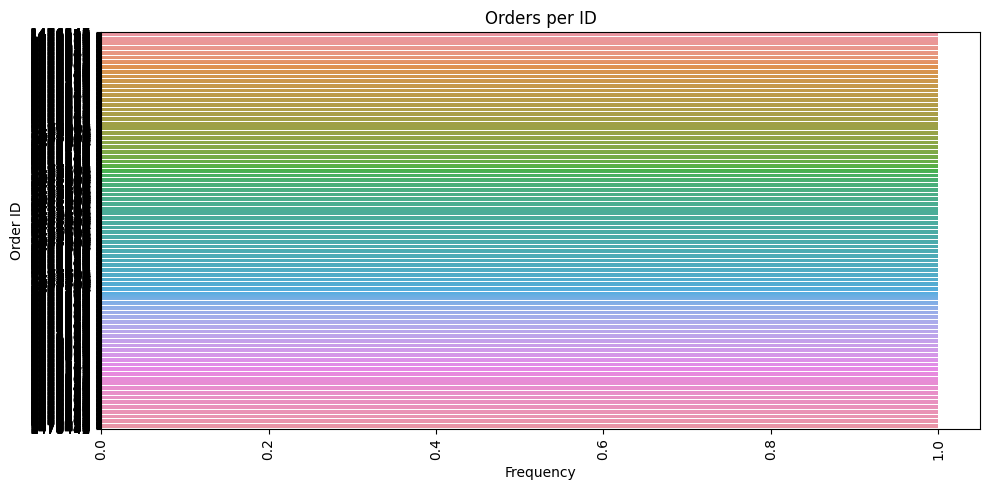

In [ ]:
# Plotting order id
plt.figure(figsize=(10, 5))

sns.countplot(y='order_id', data=X)
plt.title('Orders per ID')
plt.xlabel('Frequency')
plt.ylabel('Order ID')

plt.xticks(rotation=90)  # Rotate the labels for better readability
plt.tight_layout()  # Adjust spacing between the plot elements

plt.show()

#### Customer ID

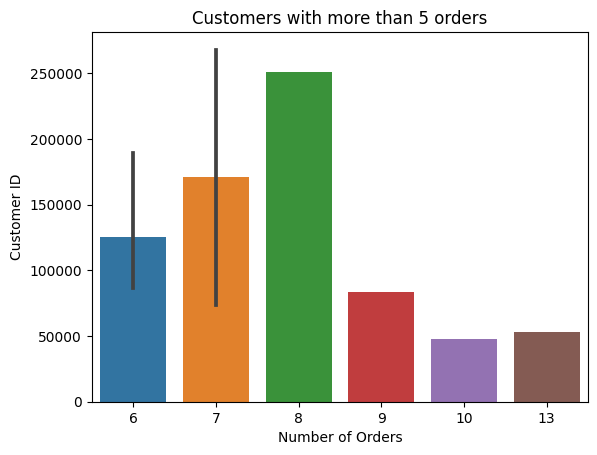

In [ ]:
# Plotting for customer_id with more than 5 orders
customers = X['customer_id'].value_counts()
customers = customers[customers > 5]

sns.barplot(y=customers.index, x=customers.values)
plt.xlabel('Number of Orders')
plt.ylabel('Customer ID')
plt.title('Customers with more than 5 orders')
plt.show()

#### Restaurant name

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


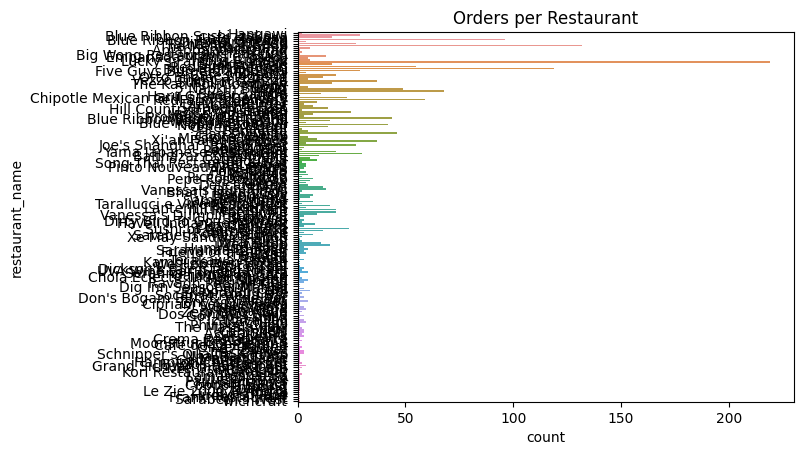

In [ ]:
# Plotting for restaurant_name
sns.countplot(y='restaurant_name', data=X)
plt.title('Orders per Restaurant')
plt.show()

#### Cuisine type

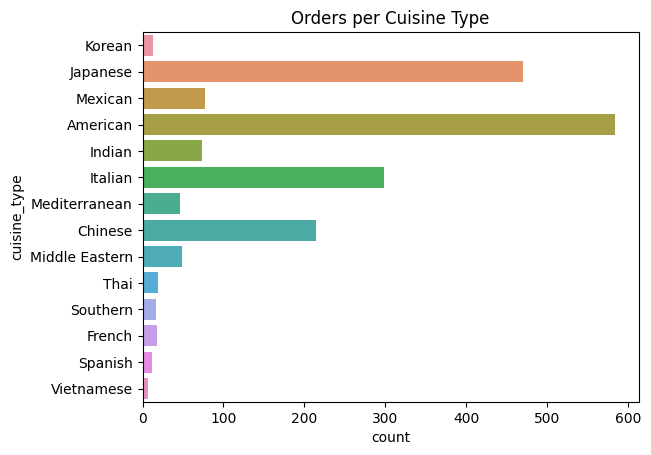

In [ ]:
# Plotting for cuisine_type
sns.countplot(y='cuisine_type', data=X)
plt.title('Orders per Cuisine Type')
plt.show()

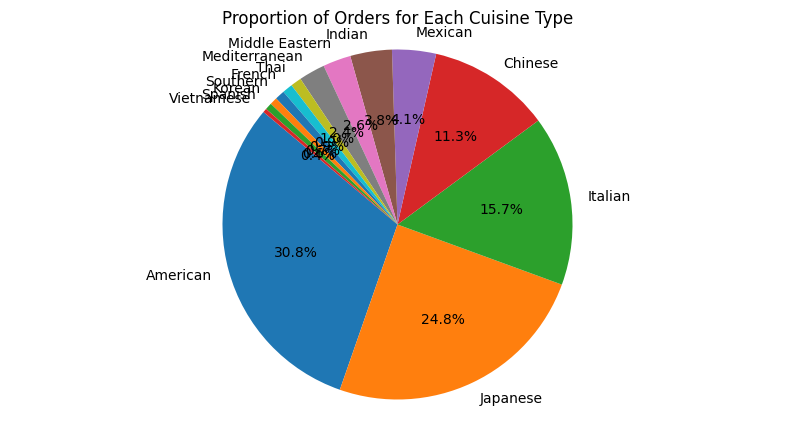

In [ ]:
cuisines = X['cuisine_type'].value_counts()

plt.figure(figsize=(10, 5))
plt.pie(cuisines, labels=cuisines.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Orders for Each Cuisine Type')
plt.show()


#### Cost of the order

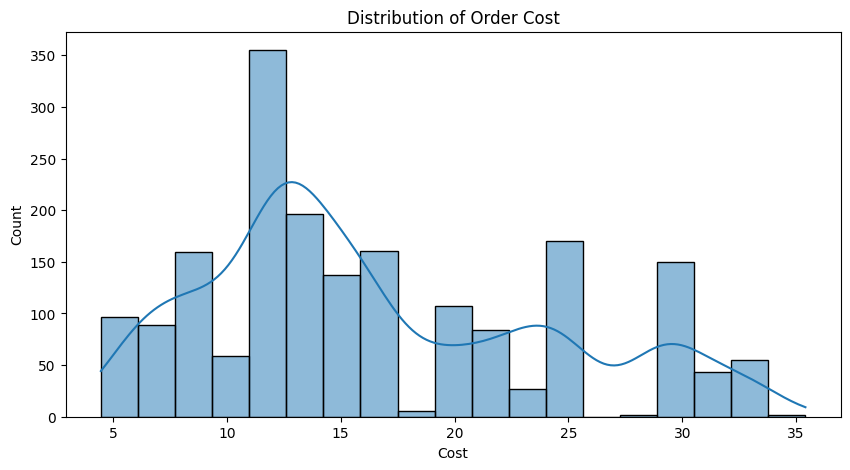

In [ ]:
# Adjust the figure size
plt.figure(figsize=(10, 5))

# Plotting for cost
sns.histplot(X['cost_of_the_order'], kde=True)
plt.title('Distribution of Order Cost')
plt.xlabel('Cost')
plt.show()

#### Day of the week

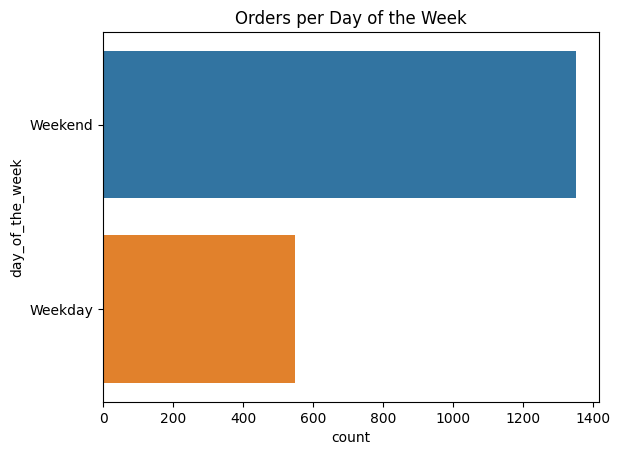

In [ ]:
# Plotting for day_of_the_week
sns.countplot(y='day_of_the_week', data=X)
plt.title('Orders per Day of the Week')
plt.show()

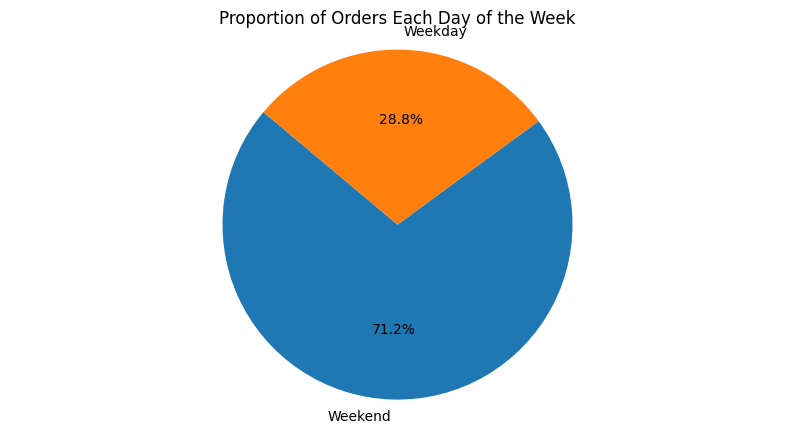

In [ ]:
days = X['day_of_the_week'].value_counts()

plt.figure(figsize=(10, 5))
plt.pie(days, labels=days.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Proportion of Orders Each Day of the Week')
plt.show()


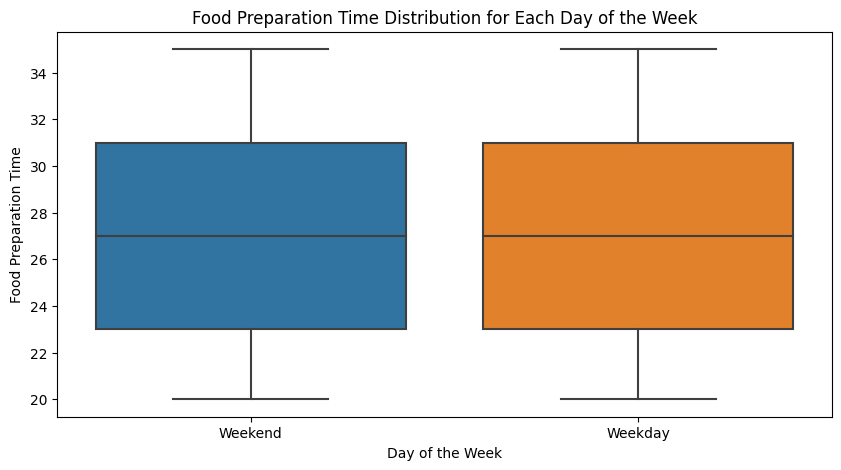

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=X)
plt.title('Food Preparation Time Distribution for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Food Preparation Time')
plt.show()

#### Rating

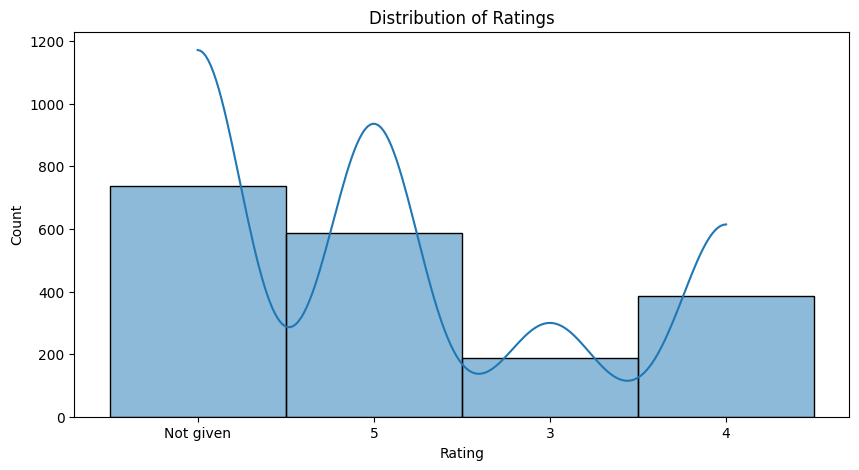

In [ ]:
# Adjust the figure size
plt.figure(figsize=(10, 5))

# Plotting for rating
sns.histplot(X['rating'], kde=True)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.show()

#### Food Preparation time

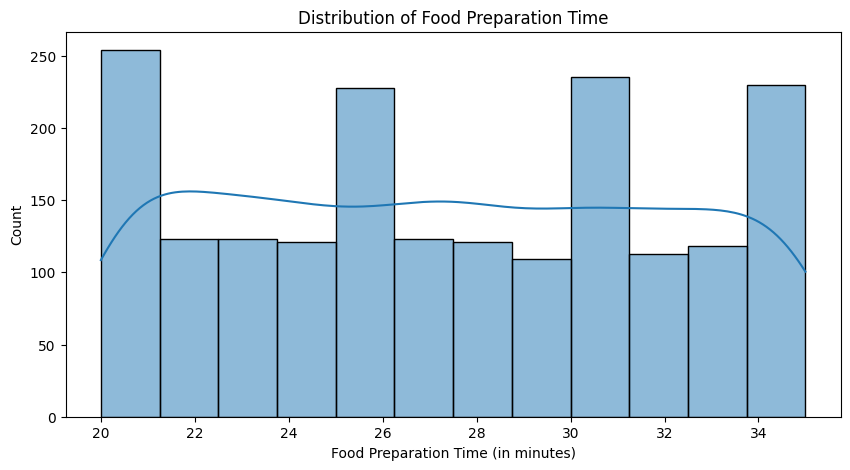

In [ ]:
# Adjust the figure size
plt.figure(figsize=(10, 5))

# Plotting for food_preparation_time
sns.histplot(X['food_preparation_time'], kde=True)
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Food Preparation Time (in minutes)')
plt.show()

#### Delivery time

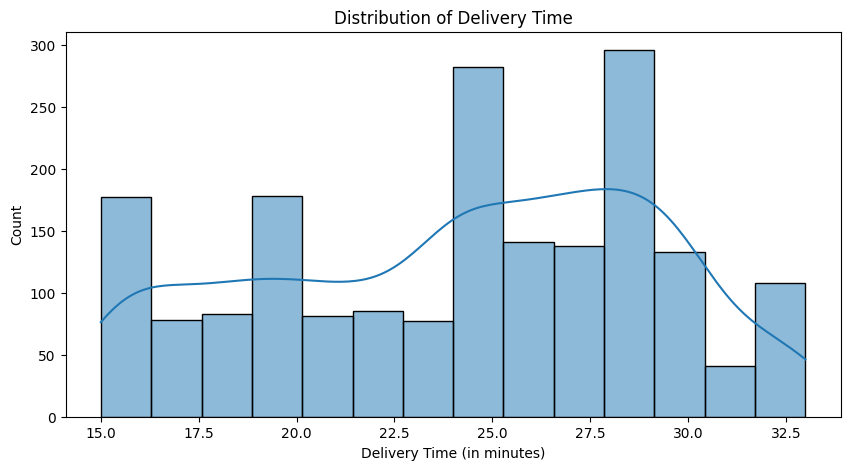

In [ ]:
# Adjust the figure size
plt.figure(figsize=(10,5))

# Plotting for delivery_time
sns.histplot(X['delivery_time'], kde=True)
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (in minutes)')
plt.show()

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? 

In [ ]:
X['restaurant_name'].value_counts().head(5)

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

### **Question 8**: Which is the most popular cuisine on weekends?

In [ ]:
X.loc[X['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().nlargest(1)

American    415
Name: cuisine_type, dtype: int64

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
pct_more_20_dol = sum(X['cost_of_the_order'] > 20)/X.shape[0]*100
print('Orders costing more than $20 account for {}% of the orders.'.format(round(pct_more_20_dol,2)))

Orders costing more than $20 account for 29.24% of the orders.


### **Question 10**: What is the mean order delivery time?

In [ ]:
mean_order_del_time = np.mean(X['delivery_time'])
print('The mean order delivery time is {} minutes.'.format(round(mean_order_del_time,2)))

The mean order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# First, count the frequency of each customer_id
customer_counts = X['customer_id'].value_counts()

# Then, get the top 3 most frequent customers
top_customers = customer_counts.head(3)

# Print the results
for i in range(3):
    print(f"Customer ID: {top_customers.index[i]}, Number of orders: {top_customers.values[i]}")


Customer ID: 52832, Number of orders: 13
Customer ID: 47440, Number of orders: 10
Customer ID: 83287, Number of orders: 9


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cuisine vs Cost of the order

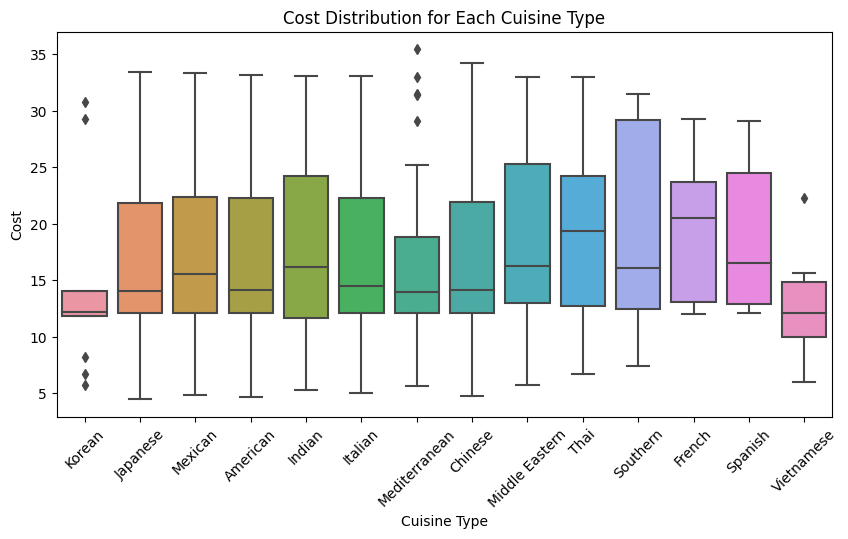

In [ ]:
# Ploting cost distribution for each cuisine type
plt.figure(figsize=(10, 5))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=X)
plt.title('Cost Distribution for Each Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Fit the ANOVA model
model = ols('cost_of_the_order ~ C(cuisine_type)', data=X).fit()

# Perform ANOVA to evaluate relation of the variables
anova_table = sm.stats.anova_lm(model)

# Print the ANOVA table
print(anova_table)

                     df         sum_sq    mean_sq         F    PR(>F)
C(cuisine_type)    13.0    1101.909994  84.762307  1.518792  0.102979
Residual         1884.0  105144.210702  55.809029       NaN       NaN


p-value above is larger than the typical significance level of 0.05, indicating that the observed differences between cuisine types may not be statistically significant.

#### Cuisine vs Food Preparation time

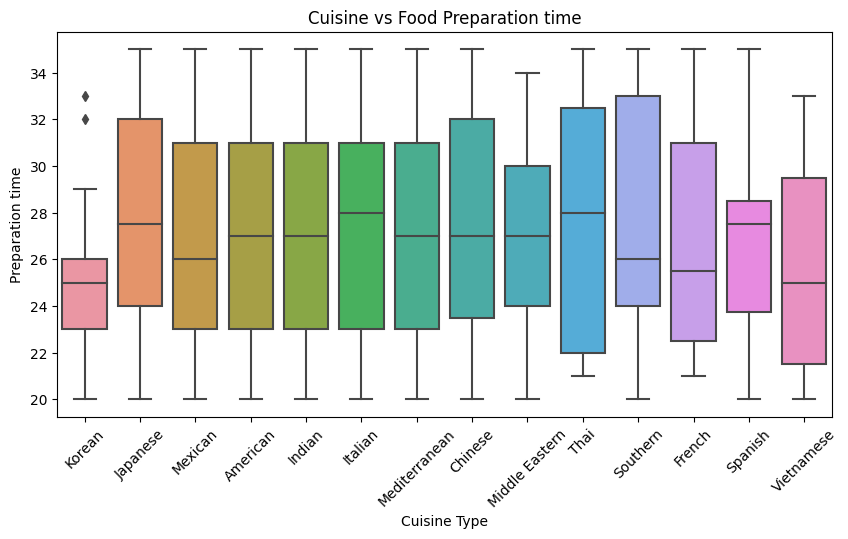

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=X)
plt.title('Cuisine vs Food Preparation time')
plt.xlabel('Cuisine Type')
plt.ylabel('Preparation time')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Fit the ANOVA model
model = ols('food_preparation_time ~ C(cuisine_type)', data=X).fit()

# Perform ANOVA to evaluate relation of the variables
anova_table = sm.stats.anova_lm(model)

# Print the ANOVA table
print(anova_table)

                     df        sum_sq    mean_sq        F    PR(>F)
C(cuisine_type)    13.0    161.154366  12.396490  0.57598  0.874893
Residual         1884.0  40548.234464  21.522417      NaN       NaN


p-value above is larger than the typical significance level of 0.05, indicating that the observed differences between cuisine types may not be statistically significant.

#### Day of the Week vs Delivery time

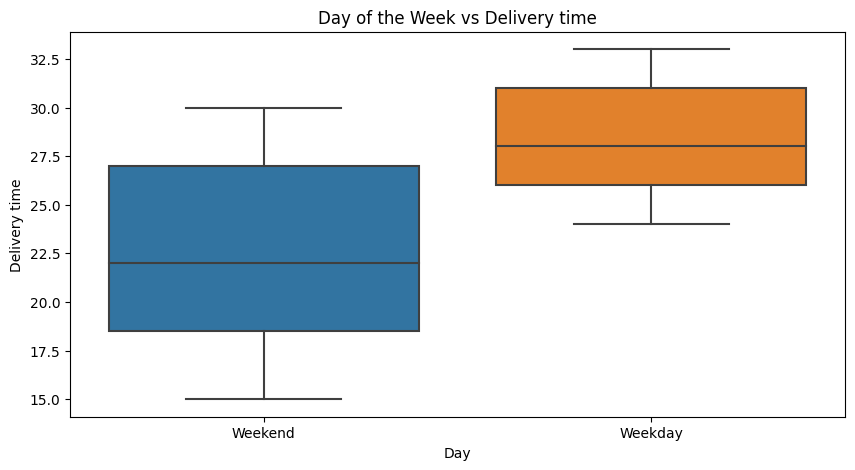

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=X)
plt.title('Day of the Week vs Delivery time')
plt.xlabel('Day')
plt.ylabel('Delivery time')
plt.xticks()
plt.show()

In [ ]:
# Convert day_of_the_week to numeric format if needed
X['day_of_the_week'] = X['day_of_the_week'].astype('category').cat.codes

# Fit the ANOVA model
model = ols('day_of_the_week ~ C(delivery_time)', data=X).fit()

# Perform ANOVA to evaluate relation of the variables
anova_table = sm.stats.anova_lm(model)

# Print the ANOVA table
print(anova_table)

                      df      sum_sq   mean_sq         F         PR(>F)
C(delivery_time)    18.0  152.437049  8.468725  67.16541  1.767466e-187
Residual          1879.0  236.918589  0.126088       NaN            NaN


p-value above is smaller than the typical significance level of 0.05, indicating that the observed differences between variables may be statistically significant.

#### Day of the Week vs Food Preparation time

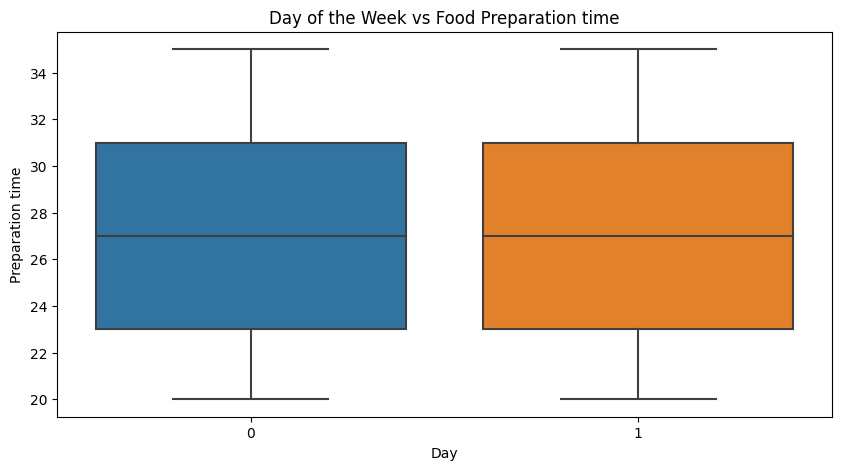

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=X)
plt.title('Day of the Week vs Food Preparation time')
plt.xlabel('Day')
plt.ylabel('Preparation time')
plt.xticks()
plt.show()

In [ ]:
# Fit the ANOVA model
model = ols('day_of_the_week ~ C(food_preparation_time)', data=X).fit()

# Perform ANOVA to evaluate relation of the variables
anova_table = sm.stats.anova_lm(model)

# Print the ANOVA table
print(anova_table)

                              df      sum_sq   mean_sq         F    PR(>F)
C(food_preparation_time)    15.0    1.897529  0.126502  0.614458  0.865402
Residual                  1882.0  387.458108  0.205876       NaN       NaN


p-value above is larger than the typical significance level of 0.05, indicating that the observed differences between variables may not be statistically significant.

#### Rating vs Delivery time

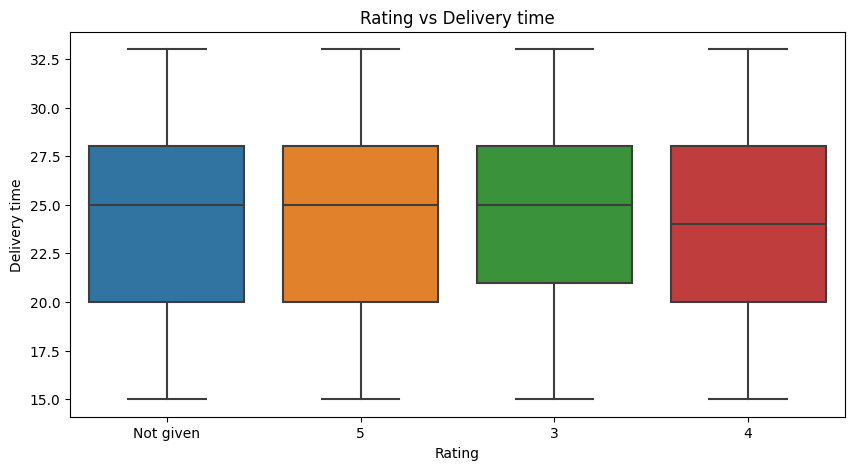

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='rating', y='delivery_time', data=X)
plt.title('Rating vs Delivery time')
plt.xlabel('Rating')
plt.ylabel('Delivery time')
plt.xticks()
plt.show()

In [ ]:
# Convert rating to numeric format
X['rating'] = pd.to_numeric(X['rating'], errors='coerce')

# Fit the ANOVA model
model = ols('rating ~ C(delivery_time)', data=X).fit()

# Perform ANOVA to evaluate relation of the variables
anova_table = sm.stats.anova_lm(model)

# Print the ANOVA table
print(anova_table)

                      df      sum_sq   mean_sq         F    PR(>F)
C(delivery_time)    18.0   11.243012  0.624612  1.138531  0.307861
Residual          1143.0  627.063357  0.548612       NaN       NaN


p-value above is larger than the typical significance level of 0.05, indicating that the observed differences between variables may not be statistically significant.

#### Rating vs Cost of the order

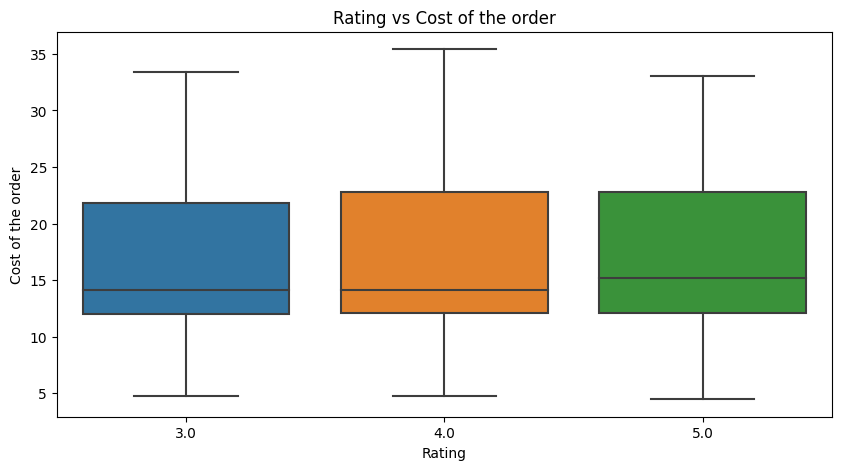

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='rating', y='cost_of_the_order', data=X)
plt.title('Rating vs Cost of the order')
plt.xlabel('Rating')
plt.ylabel('Cost of the order')
plt.xticks()
plt.show()

In [ ]:
# Fit the ANOVA model
model = ols('rating ~ C(cost_of_the_order)', data=X).fit()

# Perform ANOVA to evaluate relation of the variables
anova_table = sm.stats.anova_lm(model)

# Print the ANOVA table
print(anova_table)

                         df      sum_sq   mean_sq         F    PR(>F)
C(cost_of_the_order)  311.0  188.226377  0.605230  1.142628  0.071643
Residual              903.0  478.302904  0.529682       NaN       NaN


p-value above is slightly larger than the typical significance level of 0.05, indicating that the observed differences between variables may not be statistically significant.

#### Correlation among variables

<ipython-input-88-61c39a344beb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix_corr = X.corr()


<Axes: title={'center': 'Correlation among variables'}>

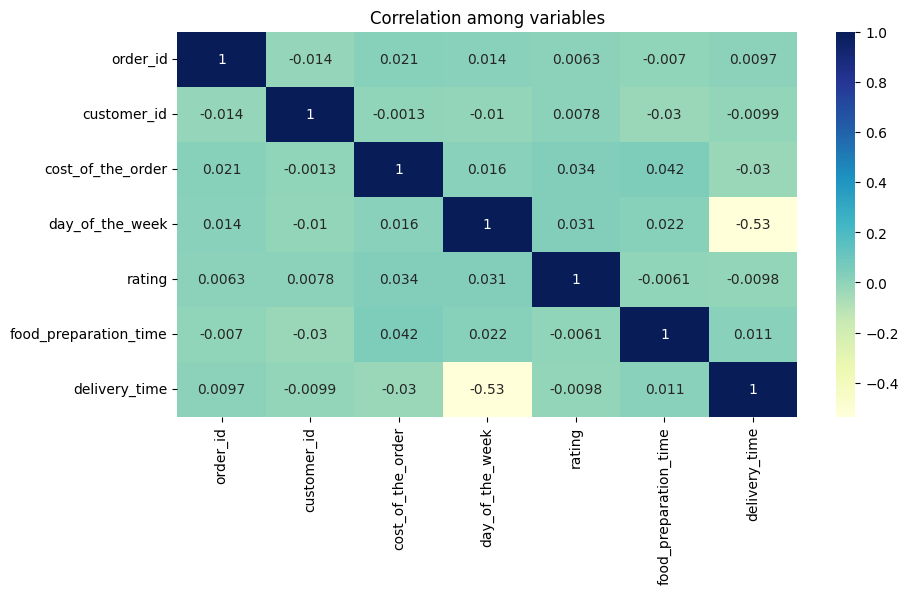

In [ ]:
matrix_corr = X.corr()
plt.figure(figsize=(10,5))
plt.title('Correlation among variables')
sns.heatmap(matrix_corr, annot=True, cmap='YlGnBu')

Based on matrix above, we can conclude that variables are not significantly correlated.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer.

In [ ]:
X['rating'] = X['rating'].replace('Not given', 0)
X['rating'] = pd.to_numeric(X['rating'])

In [ ]:
# Calculate the sum of ratings for each restaurant
rating_sum = X.groupby('restaurant_name')['rating'].sum()

#print(rating_sum)

# Calculate the average rating for each restaurant
average_ratings = X.groupby('restaurant_name')['rating'].mean()

# Create a dataframe from the series objects
ratings_df = pd.DataFrame({'RatingSum': rating_sum, 'AverageRating': average_ratings})

# Filter the restaurants that meet the criteria
eligible_restaurants = ratings_df[(ratings_df['RatingSum'] > 50) & (ratings_df['AverageRating'] > 4)]

# Print the results
print(eligible_restaurants)

                                       RatingSum  AverageRating
restaurant_name                                                
Bareburger                                  69.0       4.058824
Blue Ribbon Fried Chicken                  277.0       4.328125
Blue Ribbon Sushi                          308.0       4.219178
Blue Ribbon Sushi Bar & Grill              101.0       4.590909
Blue Ribbon Sushi Izakaya                   78.0       4.333333
Cafe Mogador                                54.0       4.153846
Chipotle Mexican Grill $1.99 Delivery       63.0       4.200000
Five Guys Burgers and Fries                 82.0       4.555556
Han Dynasty                                102.0       4.434783
J. G. Melon                                 53.0       4.416667
Jack's Wife Freda                           82.0       4.315789
Momoya                                      94.0       4.272727
Nobu Next Door                             100.0       4.347826
Parm                                    

There are no restaurants with a rating higher than 50 and average rating higher than 4.

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
#Calculate the company's revenue from each order
X['revenue'] = X['cost_of_the_order'].apply(lambda x: x * 0.25 if x > 20 else (x * 0.15 if x > 5 else 0))

#Calculate the net revenue generated by the company across all orders
net_revenue = X['revenue'].sum()

#Print the net revenue
print(f"Net Revenue: {net_revenue}")

Net Revenue: 6166.303


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.)

In [ ]:
# Create a column with the sum of preparation time and delivery time
X['total_time'] = X['food_preparation_time'] + X['delivery_time']

# Count the number of orders that take more than 60 minutes in total
var1 = len(X[X['total_time'] > 60])

# Divide the number of orders that take more than 60 minutes in total by the total number of orders, multiply by 100 and get the answer
print(f"Percentage of orders that take more than 60 minutes to get delivered from the time the order is placed: {round((var1 / len(X))*100,2)}%")


Percentage of orders that take more than 60 minutes to get delivered from the time the order is placed: 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Calculate the mean delivery time over weekdays and weekend.
mean_del_time = X.groupby('day_of_the_week')['delivery_time'].mean()

# Calculate the percentage difference in delivery time between the weekend and weekdays
pct_difference_in_delivery_time = round((mean_del_time[0] - mean_del_time[1])/mean_del_time[0]*100,2)

print('Weekend mean delivery time is {} minutes whilst on weekdays mean delivery time is {} minutes. On average, over the weekend deliveries are {}% quicker.'.format(round(mean_del_time[1],2),round(mean_del_time[0],2), pct_difference_in_delivery_time))

Weekend mean delivery time is 22.47 minutes whilst on weekdays mean delivery time is 28.34 minutes. On average, over the weekend deliveries are 20.71% quicker.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.)

Based on our analysis, we observed the following:
- There is a higher traffic of orders during the weekends. 
- Looking at the feedback ratings, more promotions could be focused on weekdays, to get more orders. 
- We would like to recommend that order cost could be reviewed, especially for the American cuisine, seeing that it has the highest rating. 
- The average rating bar could also be slightly dropped, so as to get more restaurants to benefit from the promotional offer. 
- Lastly we would like to recommend that preference is given to weekend orders, with more delivery service providers engaged, seeing that there is a higher volume of orders on weekends. This would in turn increase returns on sales, especially during the weekends.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c1b23615-8987-4f98-8849-d94df1b952a1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>